In [82]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
#Import datasets
df_bank_additional = pd.read_excel('Datasets/bank-additional/bank-additional.xlsx')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


**Menampilkan jumlah dan dimensi dataset:**

In [84]:
df_bank_additional.shape

(4119, 21)

**DATA ANALYSIS DAN VISUALISASI DATA**

Menampilkan informasi tipe data dan missing value:

In [85]:
df_bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [86]:
df_bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92893.0,-46.2,1313.0,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93994.0,-36.4,4855.0,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94465.0,-41.8,4962.0,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94465.0,-41.8,4959.0,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4191.0,5195.8,no


In [87]:
df_bank_additional.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93918.0,-42.7,4958.00,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93918.0,-42.7,4959.00,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92893.0,-46.2,1354.00,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93444.0,-36.1,4966.00,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4.12,5195.8,no


**Memeriksa Data yang missing value**


In [88]:
numerical = list(df_bank_additional.select_dtypes(include=['int64']).columns.values) + list(df_bank_additional.select_dtypes(include=['float64']).columns.values)
categorical = list(df_bank_additional.select_dtypes(include=['object']))

In [89]:
print('Tipe numerical:','\n', numerical)
print('\n')
print('Tipe categorical:','\n', categorical)

Tipe numerical: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Tipe categorical: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [90]:
numeric = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']
for col in numeric:
    df_bank_additional[col] = pd.to_numeric(df_bank_additional[col], errors='coerce')

In [91]:
numerical = numerical + numeric

In [92]:
df_bank_additional[numerical].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,emp.var.rate,cons.price.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,84854.473707,-40.499102,3173.013006,5166.481695,0.084972,84854.473707,3173.013006,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,27265.192237,4.594578,2093.875432,73.667904,1.563114,27265.192237,2093.875432,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.635000,4963.600000,-3.400000,93.200000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000,-1.800000,92893.000000,1281.000000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93749.000000,-41.800000,4856.000000,5191.000000,1.100000,93749.000000,4856.000000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000,1.400000,93994.000000,4961.000000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000,1.400000,94767.000000,5045.000000,5228.100000


**DATA CLEANING**

Mencari missing value

In [93]:
df_bank_additional.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [102]:
for col in df_bank_additional.columns:
    if df_bank_additional[col].dtype == 'object':
        print(col, df_bank_additional[col].nunique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [103]:
df_bank_additional.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Masih ada nilai 'NaN' yang harus diisi dengan suatu nilai. Kita akan isi 'NaN' dengan nilai mean.

In [104]:
data_NaN = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']

for col in data_NaN:
    df_bank_additional[col] = df_bank_additional[col].fillna(df_bank_additional[col].mean())

In [105]:
df_bank_additional.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**DATA VISUALIZATION**

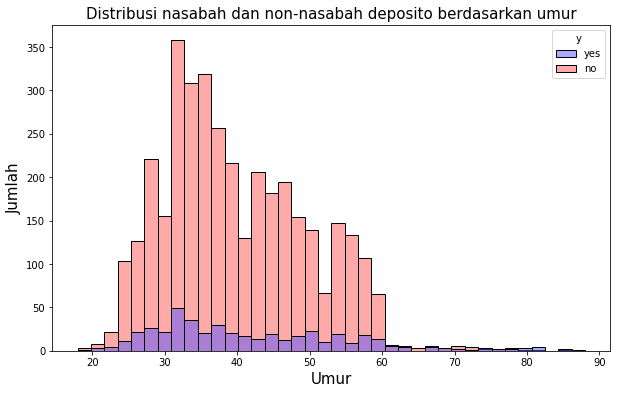

In [116]:
plt.figure(figsize=(10,6))

hue_order = ['yes','no']
sns.histplot(data = df_bank_additional, x = df_bank_additional['age'],
            multiple = 'layer', 
             hue = df_bank_additional['y'], 
             hue_order = hue_order, 
             palette = 'seismic')

plt.title('Distribusi nasabah dan non-nasabah deposito berdasarkan umur',fontsize=15)
plt.xlabel('Umur', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()


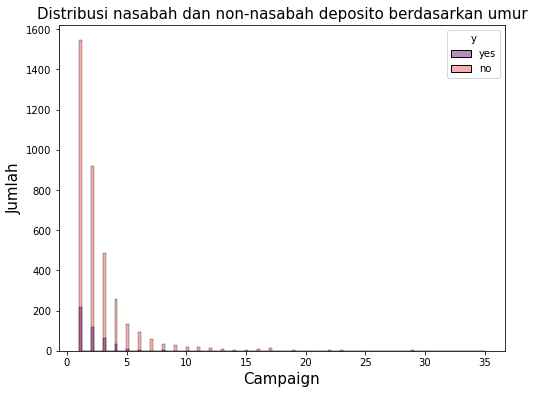

In [114]:
plt.figure(figsize=(8,6))

hue_order = ['yes','no']
sns.histplot(data = df_bank_additional, x = df_bank_additional['campaign'],
             multiple = 'layer', hue = df_bank_additional['y'], 
             hue_order=hue_order, palette='magma')

plt.title('Distribusi nasabah dan non-nasabah deposito berdasarkan umur',fontsize=15)
plt.xlabel('Campaign', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()

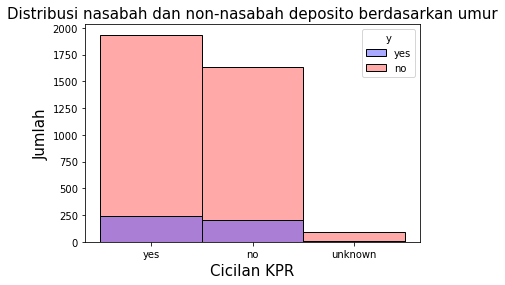

In [117]:
hue_order = ['yes','no']
sns.histplot(data = df_bank_additional, x = df_bank_additional['housing'],
             multiple = 'layer', hue = df_bank_additional['y'],
             hue_order = hue_order, palette = 'seismic')

plt.title('Distribusi nasabah dan non-nasabah deposito berdasarkan umur',fontsize=15)
plt.xlabel('Cicilan KPR', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()

**DATA PREPROCESING**

Encoding data categorical:

In [118]:
from sklearn .preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_bank_additional.columns:
    if df_bank_additional[col].dtype == 'object':
        df_bank_additional[col]=le.fit_transform(df_bank_additional[col])

Scaling data set:

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_bank_additional.drop(['y'],axis=1)
y = df_bank_additional['y']

data = scaler.fit_transform(X)

Split dataset menjadi data train dan data test:

In [121]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**MODEL**

In [122]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=300,solver='liblinear')

LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

In [123]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)

In [124]:
#SVM
from sklearn.svm import SVC

SVM = SVC(max_iter=2000)

SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)

In [125]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)

In [126]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

In [127]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=200)

RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)

**RESULT**

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

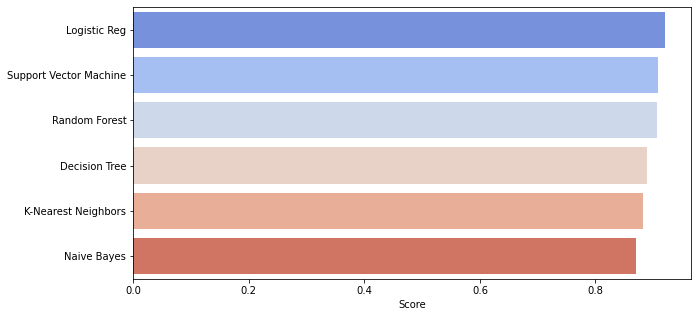

Score Tertinggi =  0.92


,Score
Logistic Reg,0.919903
Support Vector Machine,0.907767
Random Forest,0.906553
Decision Tree,0.888350
K-Nearest Neighbors,0.882282
Naive Bayes,0.870146


In [129]:
LR = accuracy_score(y_test, y_pred_LR)
KNN = accuracy_score(y_test, y_pred_KNN)
SVM = accuracy_score(y_test, y_pred_SVM)
NB = accuracy_score(y_test, y_pred_NB)
DT = accuracy_score(y_test, y_pred_DT)
RFC = accuracy_score(y_test, y_pred_RFC)

score = pd.DataFrame([[LR],[KNN],[SVM],[NB],[DT],[RFC]],
                     index=['Logistic Reg','K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest'])
score.columns = ['Score']

score = score.sort_values(by=['Score'],axis=0,ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(y=score.index,x=score['Score'],palette='coolwarm',order=score.index)
plt.show()

max = round(score.max(0)[0],ndigits=3)
print('Score Tertinggi = ', max)
score

In [130]:
max = score.max(0).values
print('Score Terbesar = ', max)

Score Terbesar =  [0.91990291]


CLASSIFICATION REPORT & CONFUSION MATRIX

In [131]:
print('Confusion Matrix Logistic Regression:',"\n")
print(confusion_matrix(y_test,y_pred_LR))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_LR))

Confusion Matrix Logistic Regression: 

[[723  25]
 [ 41  35]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       748
           1       0.58      0.46      0.51        76

    accuracy                           0.92       824
   macro avg       0.76      0.71      0.74       824
weighted avg       0.91      0.92      0.92       824



In [132]:
print('Confusion Matrix K-Nearest Neighbors:',"\n")
print(confusion_matrix(y_test,y_pred_KNN))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_KNN))

Confusion Matrix K-Nearest Neighbors: 

[[697  51]
 [ 46  30]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       748
           1       0.37      0.39      0.38        76

    accuracy                           0.88       824
   macro avg       0.65      0.66      0.66       824
weighted avg       0.89      0.88      0.88       824



In [133]:
print('Confusion Matrix Support Vector Machine:',"\n")
print(confusion_matrix(y_test,y_pred_SVM))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_SVM))

Confusion Matrix Support Vector Machine: 

[[748   0]
 [ 76   0]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       748
           1       0.00      0.00      0.00        76

    accuracy                           0.91       824
   macro avg       0.45      0.50      0.48       824
weighted avg       0.82      0.91      0.86       824



C:\Users\zaenal.abidin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
print('Confusion Matrix Decision Tree:',"\n")
print(confusion_matrix(y_test,y_pred_DT))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_DT))

Confusion Matrix Decision Tree: 

[[694  54]
 [ 38  38]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       748
           1       0.41      0.50      0.45        76

    accuracy                           0.89       824
   macro avg       0.68      0.71      0.70       824
weighted avg       0.90      0.89      0.89       824



In [135]:
print('Confusion Matrix Random Forest:',"\n")
print(confusion_matrix(y_test,y_pred_RFC))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_RFC))

Confusion Matrix Random Forest: 

[[712  36]
 [ 41  35]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       748
           1       0.49      0.46      0.48        76

    accuracy                           0.91       824
   macro avg       0.72      0.71      0.71       824
weighted avg       0.90      0.91      0.91       824



In [136]:
print('Confusion Matrix Naive Bayes:',"\n")
print(confusion_matrix(y_test,y_pred_NB))

print("\n")

print('Classification Report:',"\n",
      classification_report(y_test,y_pred_NB))

Confusion Matrix Naive Bayes: 

[[675  73]
 [ 34  42]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       748
           1       0.37      0.55      0.44        76

    accuracy                           0.87       824
   macro avg       0.66      0.73      0.68       824
weighted avg       0.90      0.87      0.88       824



**CONCLUSION**

In [137]:
max = score.max(0)[0]
print('Score Tertinggi = ', max)

Score Tertinggi =  0.9199029126213593


Dari hasil pembuatan model di atas, Algoritma terbaik dengan score accuracy tertinggi adalah **LOGISTIC REGRESSION**

Kemudian, model tersebut digunakan pada dataset "bank-additional-full.xlsx"

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


C:\Users\zaenal.abidin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


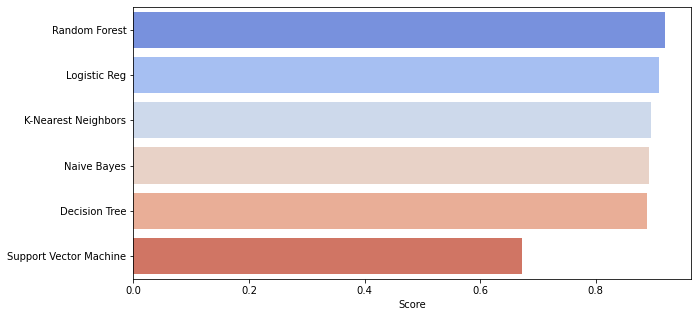

Score Tertinggi =  0.92


,Score
Random Forest,0.919519
Logistic Reg,0.910172
K-Nearest Neighbors,0.895120
Naive Bayes,0.891964
Decision Tree,0.888322
Support Vector Machine,0.671886


In [141]:
#Import dataset

df_bank_additional_full = pd.read_excel('Datasets/bank-additional/bank-additional-full.xlsx')

numerical = list(df_bank_additional_full.select_dtypes(include=['int64']).columns.values) + list(df_bank_additional_full.select_dtypes(include=['float64']).columns.values)
categorical = list(df_bank_additional_full.select_dtypes(include=['object']))


numeric = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']
for col in numeric:
    df_bank_additional_full[col] = pd.to_numeric(df_bank_additional_full[col], errors='coerce')

numerical = numerical + numeric

for col in df_bank_additional_full.columns:
    if df_bank_additional_full[col].dtype == 'object':
        print(col, df_bank_additional_full[col].nunique())

data_NaN = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']

for col in data_NaN:
    df_bank_additional_full[col] = df_bank_additional_full[col].fillna(df_bank_additional_full[col].mean())


le = LabelEncoder()

for col in df_bank_additional_full.columns:
    if df_bank_additional_full[col].dtype == 'object':
        df_bank_additional_full[col]=le.fit_transform(df_bank_additional_full[col])

scaler = StandardScaler()

X = df_bank_additional_full.drop(['y'],axis=1)
y = df_bank_additional_full['y']

df_bank_additional_full = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LR = LogisticRegression(max_iter=300,solver='liblinear')
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)

SVM = SVC(max_iter=2000)
SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)

#Visualisasi

LR = accuracy_score(y_test, y_pred_LR)
KNN = accuracy_score(y_test, y_pred_KNN)
SVM = accuracy_score(y_test, y_pred_SVM)
NB = accuracy_score(y_test, y_pred_NB)
DT = accuracy_score(y_test, y_pred_DT)
RFC = accuracy_score(y_test, y_pred_RFC)

score = pd.DataFrame([[LR],[KNN],[SVM],[NB],[DT],[RFC]],
                     index=['Logistic Reg','K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest'])
score.columns = ['Score']

score = score.sort_values(by=['Score'],axis=0,ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(y=score.index,x=score['Score'],palette='coolwarm',order=score.index)
plt.show()

max = round(score.max(0)[0],ndigits=3)
print('Score Tertinggi = ', max)
score

In [142]:
print('Score= ', round(RFC,ndigits=3))
print('\n')
print('Confusion Matrix: ','\n', confusion_matrix(y_test, y_pred_RFC))
print('\n')
print('Classification Report: ','\n', classification_report(y_test, y_pred_RFC))

Score=  0.92


Confusion Matrix:  
 [[7083  236]
 [ 427  492]]


Classification Report:  
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7319
           1       0.68      0.54      0.60       919

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238



Kemudian, model tersebut digunakan pada dataset "bank-full.xlsx"

C:\Users\zaenal.abidin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


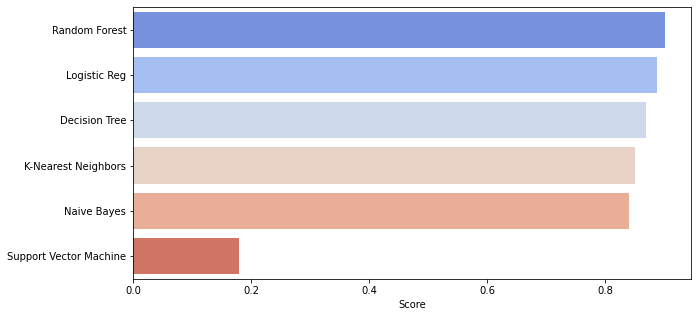

Score Tertinggi =  0.901


,Score
Random Forest,0.901028
Logistic Reg,0.888311
Decision Tree,0.868407
K-Nearest Neighbors,0.851266
Naive Bayes,0.841203
Support Vector Machine,0.179808


In [144]:
#Import dataset
df_bank_full = pd.read_excel('Datasets/bank/bank-full.xlsx')

numerical = list(df_bank_full.select_dtypes(include=['int64']).columns.values) + list(df_bank_full.select_dtypes(include=['float64']).columns.values)
categorical = list(df_bank_full.select_dtypes(include=['object']))

#numeric = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']
#for col in numeric:
#    data[col] = pd.to_numeric(data[col], errors='coerce')

#numerical = numerical + numeric

#data_NaN = ['emp.var.rate','cons.price.idx','euribor3m','nr.employed']

#for col in data_NaN:
#    data[col] = data[col].fillna(data[col].mean())


le = LabelEncoder()

for col in df_bank_full.columns:
    if df_bank_full[col].dtype == 'object':
        df_bank_full[col]=le.fit_transform(df_bank_full[col])

scaler = StandardScaler()

X = df_bank_full.drop(['y'],axis=1)
y = df_bank_full['y']

data = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LR = LogisticRegression(max_iter=300,solver='liblinear')
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)

SVM = SVC(max_iter=2000)
SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)

#Visualisasi

LR = accuracy_score(y_test, y_pred_LR)
KNN = accuracy_score(y_test, y_pred_KNN)
SVM = accuracy_score(y_test, y_pred_SVM)
NB = accuracy_score(y_test, y_pred_NB)
DT = accuracy_score(y_test, y_pred_DT)
RFC = accuracy_score(y_test, y_pred_RFC)

score = pd.DataFrame([[LR],[KNN],[SVM],[NB],[DT],[RFC]],
                     index=['Logistic Reg','K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest'])
score.columns = ['Score']

score = score.sort_values(by=['Score'],axis=0,ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(y=score.index,x=score['Score'],palette='coolwarm',order=score.index)
plt.show()

max = round(score.max(0)[0],ndigits=3)
print('Score Tertinggi = ', max)
score

In [145]:
df_bank_full = pd.read_excel('Datasets/bank/bank-full.xlsx')
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


print('Score= ', round(RFC,ndigits=3))
print('\n')
print('Confusion Matrix: ','\n', confusion_matrix(y_test, y_pred_RFC))
print('\n')
print('Classification Report: ','\n', classification_report(y_test, y_pred_RFC))

In [146]:
print('Score= ', round(RFC,ndigits=3))
print('\n')
print('Confusion Matrix: ','\n', confusion_matrix(y_test, y_pred_RFC))
print('\n')
print('Classification Report: ','\n', classification_report(y_test, y_pred_RFC))

Score=  0.901


Confusion Matrix:  
 [[7695  285]
 [ 610  453]]


Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7980
           1       0.61      0.43      0.50      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.70      0.72      9043
weighted avg       0.89      0.90      0.89      9043

